# Guided Project - Visualising The Gender Gap in College Degrees

Continuing our investigation on the gender gap in college degrees(DataQuest courses), we're going to demonstrate what we learned about intermediate plotting and display techniques with `matplotlib`. 

Although we're interested in only STEM programs, we also would want to include other categories such as Liberal Arts and Other Categories so that we can also compare the size of the gaps between categories.

In this notebook, we will be applying what we've learned from advanced visualisation techniques, namely, improving intelligibility. 

### First Things First...

As per standard procedure, let's load the required libraries first

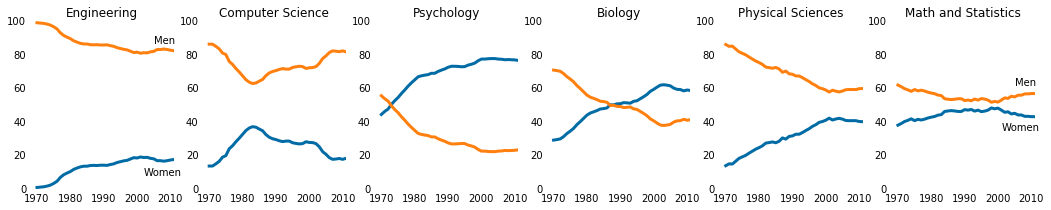

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
plt.show()

Since we're not only analysing STEM degrees, and there are 17 in all, it would make it easier for us to categorise them

In [3]:
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

What we need to do to our plots to make them a bit more readable is first:
- Order them by column
- Disable x-ticks
- Removing y-labels
- Adding a horizontal line

Since we were already given starter code, let's modify it a bit to fit our needs.

### Order Plots By Column

In [43]:
def plot_charts(plt,cats,idx):
    cat_len = len(cats)*3+idx
    for sp,m in zip(range(idx,cat_len,3),range(len(cats))):
        ax = fig.add_subplot(6,3,sp+1)
        ax.plot(women_degrees['Year'], women_degrees[cats[m]], c=cb_dark_blue, label='Women', linewidth=3)
        ax.plot(women_degrees['Year'], 100-women_degrees[cats[m]], c=cb_orange, label='Men', linewidth=3)
        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False)
        ax.spines["top"].set_visible(False)    
        ax.spines["bottom"].set_visible(False)
        ax.set_xlim(1968, 2011)
        ax.set_ylim(0,100)
        ax.set_title(cats[m])
        
        if m == 0:
            ax.text(2005, 87, 'Men')
            ax.text(2002, 8, 'Women')
        elif m == len(cats) - 1 :
            ax.text(2005, 62, 'Women')
            ax.text(2001, 35, 'Men')
        
    return idx+1

[]

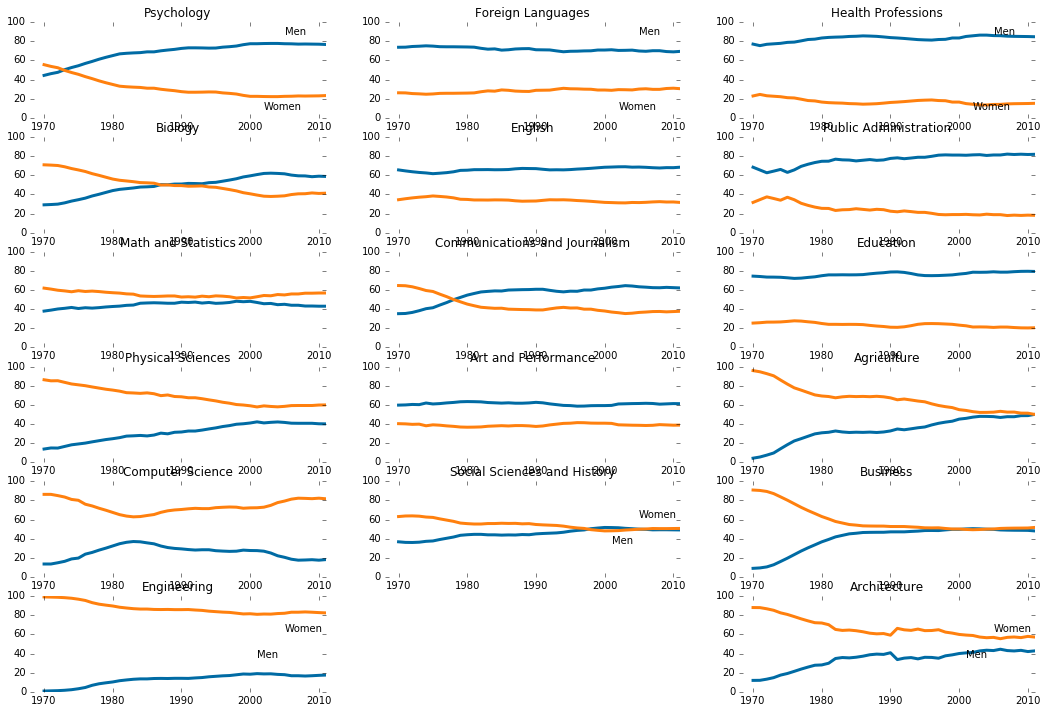

In [44]:
fig = plt.figure(figsize=(18, 12))
idx = 0

for cat in [stem_cats,lib_arts_cats,other_cats]:
    idx = plot_charts(plt,cat,idx)
    

plt.plot()

### Disabling X-Ticks

Now we see them ordered neatly by column, but the plot labels overlap with the x-ticks. We can't simply remove the labels because that would render our plots unreadable. The best way would be to remove all x-labels except for the bottom-most ones. We can do so by modifying our function to add

    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')

and for the bottom plot, enable:

    ax.tick_params(labelbottom='on')

In [45]:
def plot_charts2(plt,cats,idx):
    cat_len = len(cats)*3+idx
    for sp,m in zip(range(idx,cat_len,3),range(len(cats))):
        ax = fig.add_subplot(6,3,sp+1)
        ax.plot(women_degrees['Year'], women_degrees[cats[m]], c=cb_dark_blue, label='Women', linewidth=3)
        ax.plot(women_degrees['Year'], 100-women_degrees[cats[m]], c=cb_orange, label='Men', linewidth=3)
        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False)
        ax.spines["top"].set_visible(False)    
        ax.spines["bottom"].set_visible(False)
        ax.set_xlim(1968, 2011)
        ax.set_ylim(0,100)
        ax.set_title(cats[m])
        ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
        
        if m == 0:
            ax.text(2005, 87, 'Men')
            ax.text(2002, 8, 'Women')
        elif m == len(cats) - 1 :
            ax.text(2005, 62, 'Women')
            ax.text(2001, 35, 'Men')
            ax.tick_params(labelbottom='on')
        
    return idx+1

[]

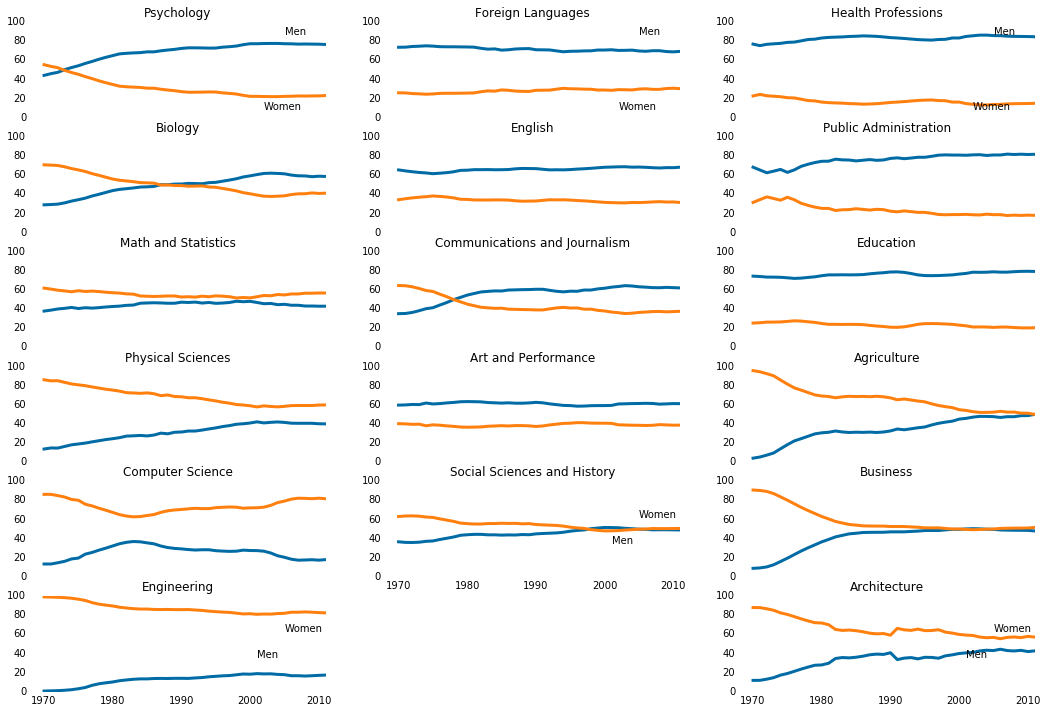

In [47]:
fig = plt.figure(figsize=(18, 12))
idx = 0

for cat in [stem_cats,lib_arts_cats,other_cats]:
    idx = plot_charts2(plt,cat,idx)
    

plt.plot()

### Removing Y-Labels

Now that we've removed the X-Ticks, the plots now look readable and uncluttered, but there's still a bit more we can do to make it more uncluttered without having to sacrifice information. We can remove the values between `0` and `100` using the `Axes.set_yticks()` method. Effectively, the code should look like:
    
    ax.set_yticks([0,100])

In [54]:
def plot_charts3(plt,cats,idx):
    cat_len = len(cats)*3+idx
    for sp,m in zip(range(idx,cat_len,3),range(len(cats))):
        ax = fig.add_subplot(6,3,sp+1)
        ax.plot(women_degrees['Year'], women_degrees[cats[m]], c=cb_dark_blue, label='Women', linewidth=3)
        ax.plot(women_degrees['Year'], 100-women_degrees[cats[m]], c=cb_orange, label='Men', linewidth=3)
        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False)
        ax.spines["top"].set_visible(False)    
        ax.spines["bottom"].set_visible(False)
        ax.set_xlim(1968, 2011)
        ax.set_ylim(0,100)
        ax.set_yticks([0,100])
        ax.set_title(cats[m])
        ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
        
        if m == 0:
            ax.text(2005, 87, 'Men')
            ax.text(2002, 8, 'Women')
        elif m == len(cats) - 1 :
            ax.text(2005, 62, 'Women')
            ax.text(2001, 35, 'Men')
            ax.tick_params(labelbottom='on')
        
    return idx+1

[]

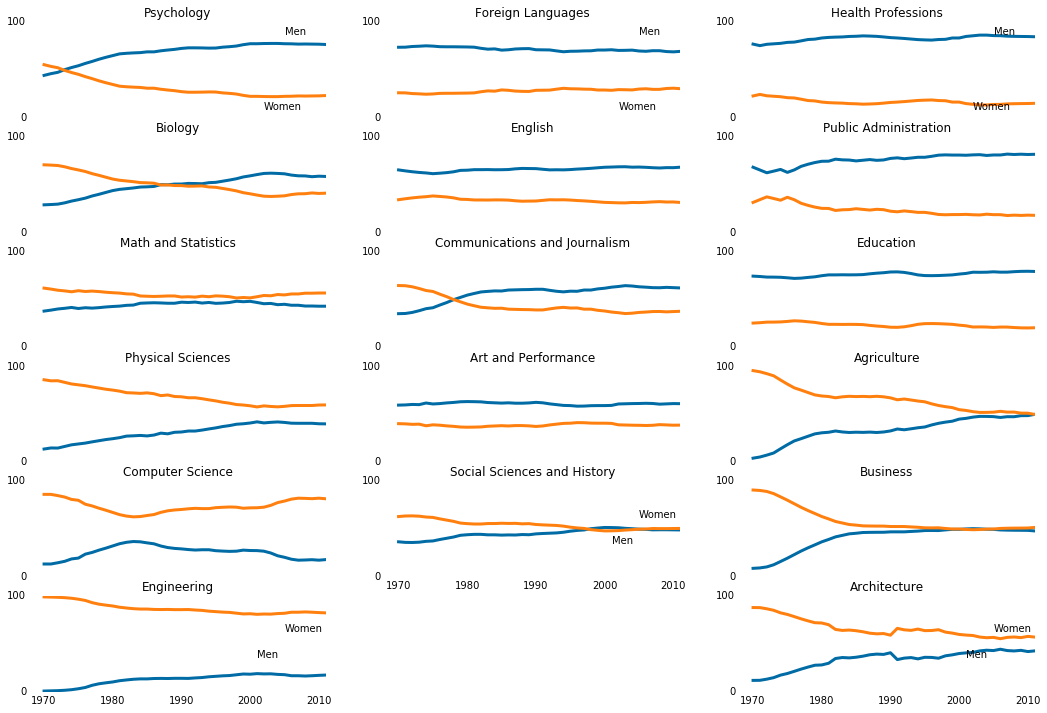

In [49]:
fig = plt.figure(figsize=(18, 12))
idx = 0

for cat in [stem_cats,lib_arts_cats,other_cats]:
    idx = plot_charts3(plt,cat,idx)
    

plt.plot()

### Adding A Horizontal Line

Removing most of the Y-labels reduced clutter but now it's made it harder to approximate the degree of the gender breakdown. A good method is by adding a horizontal line at the 50% mark as a reference. We use the `Axes.axhline()` method to add a horizontal line, and the only required parameter is the y-value, such that:

    ax.axhline(50)

puts a horizontal line at the 50th mark in the plot. 

Again, we will need to think of an appropriate colour in which to apply to our line. A solid line will look out f place and will take our attention away from the graph. We've used the [Colour Blind 10 palette](http://tableaufriction.blogspot.com/2012/11/finally-you-can-use-tableau-data-colors.html) so far for our colour scheme so, looking at the list, we'll be using the light grey(171,171,171 RGB value). Again, we mentioned that we don't want to have a solid colour so let's set the `alpha` parameter to `0.3`; parameter value must be between `0` and `1`. So now, the line of code should be:

    ax.axhline(50,c=(171/255,171/255,171/255),alpha=0.3)


In [51]:
def plot_charts4(plt,cats,idx):
    cat_len = len(cats)*3+idx
    for sp,m in zip(range(idx,cat_len,3),range(len(cats))):
        ax = fig.add_subplot(6,3,sp+1)
        ax.plot(women_degrees['Year'], women_degrees[cats[m]], c=cb_dark_blue, label='Women', linewidth=3)
        ax.plot(women_degrees['Year'], 100-women_degrees[cats[m]], c=cb_orange, label='Men', linewidth=3)
        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False)
        ax.spines["top"].set_visible(False)    
        ax.spines["bottom"].set_visible(False)
        ax.set_xlim(1968, 2011)
        ax.set_ylim(0,100)
        ax.set_yticks([0,100])
        ax.set_title(cats[m])
        ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
        ax.axhline(50,c=(171/255,171/255,171/255),alpha=0.3)
        if m == 0:
            ax.text(2005, 87, 'Men')
            ax.text(2002, 8, 'Women')
        elif m == len(cats) - 1 :
            ax.text(2005, 62, 'Women')
            ax.text(2001, 35, 'Men')
            ax.tick_params(labelbottom='on')
        
    return idx+1

[]

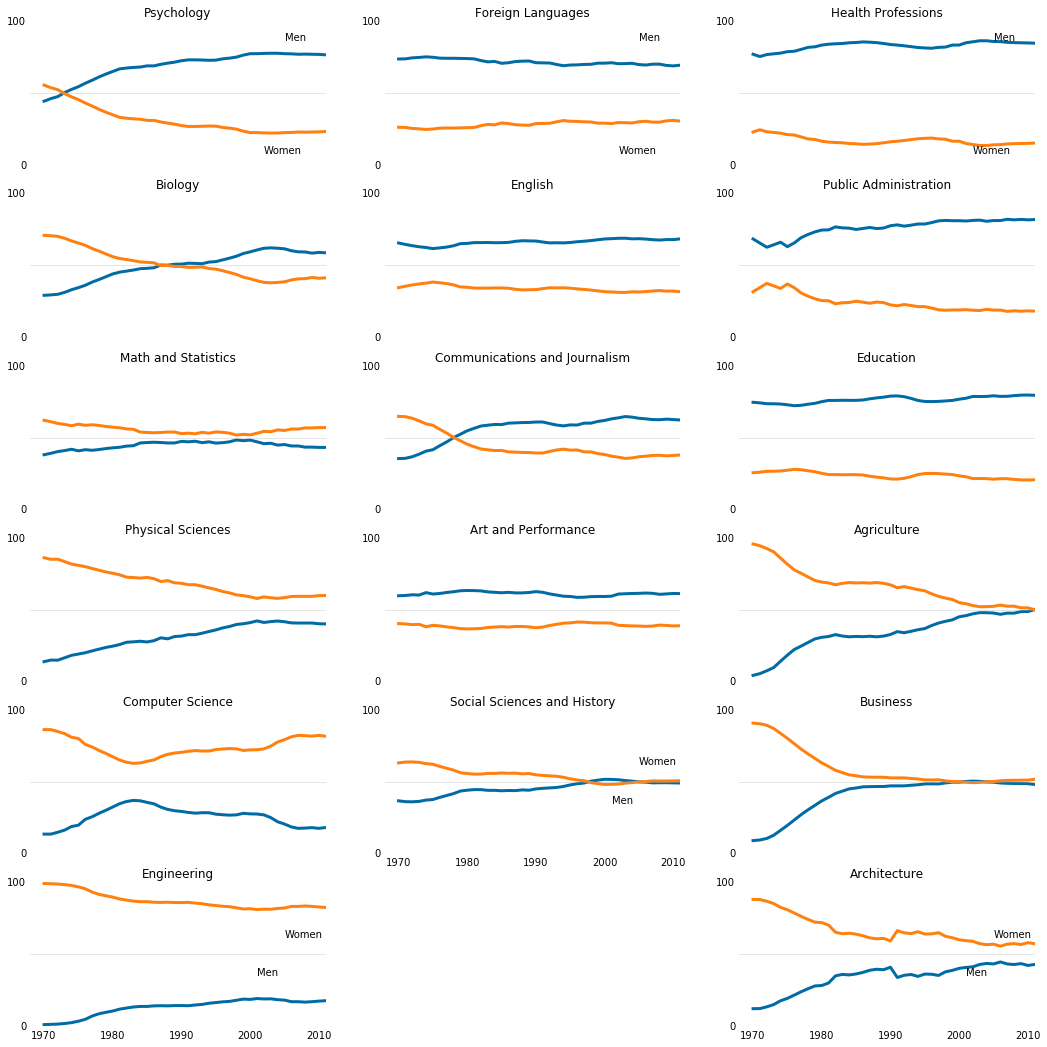

In [56]:
fig = plt.figure(figsize=(18, 18))
idx = 0

for cat in [stem_cats,lib_arts_cats,other_cats]:
    idx = plot_charts4(plt,cat,idx)
    

plt.plot()

### Exporting to File

In many cases we need to be able to export our plots especially for systems with no required modules, or even python. 

We can first check what our backend is before we can attempt to save our plot by using `matplotlib.get_backend()`

In [55]:
plt.get_backend()

'module://ipykernel.pylab.backend_inline'

We can then use the `Figure.savefig()` or `pyplot.savefig()` to export all of the plots contained in the figure as a single image file. NOTE: These have to be called before we run `pyplot.show()`

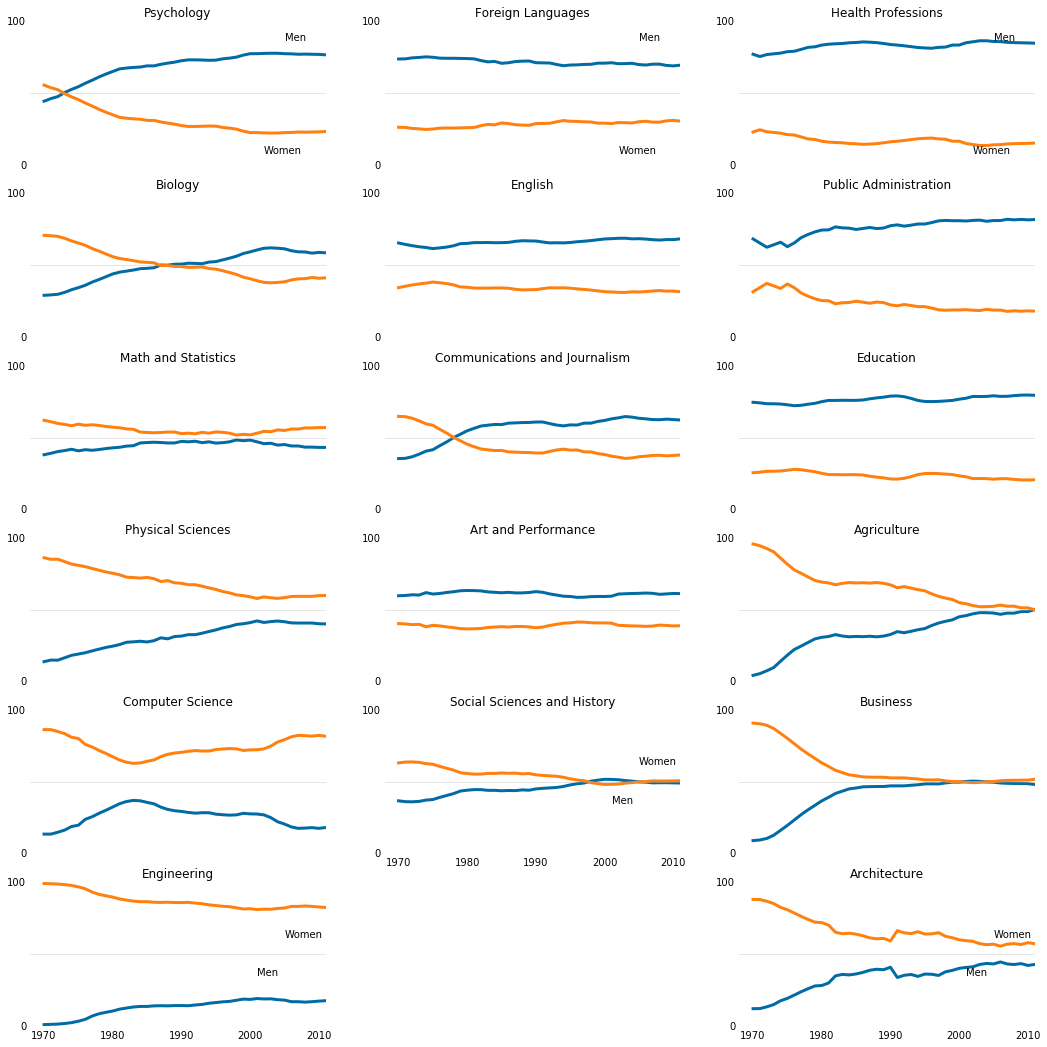

In [57]:
# We can use the final function we defined to save time

fig = plt.figure(figsize=(18, 18))
idx = 0

for cat in [stem_cats,lib_arts_cats,other_cats]:
    idx = plot_charts4(plt,cat,idx)
    

plt.plot()
plt.savefig('lineplots.png')